In [12]:
import numpy as np
import matplotlib.pyplot as plt
import random as rn
from scipy.misc import comb
import math 

Question 5 : We want to show some evidence that for the Newton-Cotes Formulas, ||Qn|| grows with n. This would indicate that Qnf doesn't got to I(f) as n goes to infinity. Design and implement a procedure to compute the weights and therefore the ''Lebesgue constant'' for the Newton-Cotes formula with n+1 nodes, for the interval [0,1]. This can be done by a quadrature rule for the integrals. Plotting the graph of ||Qn|| against n, make a guess on the functional dpendence of ||Qn|| and n.

In [13]:
def Lagrange(x, nn, nodelist):
    #computes Lagrange polynomial at a point x and for nn nodes
    somme=0 #initializing
    for i in range(nn): 
        prod=1 #initializing
        for j in range (nn): #compute Lagrange interpolation
            if j!=i :
                prod=prod*(x-nodelist[j])/(nodelist[i]-nodelist[j])
            else :
                prod=prod*1
        somme=somme+prod
    y=somme #assign f(x) to y
    return y

In [14]:
def quadrature (n):
    nodelist=np.linspace(0,1,n) #initializing node's x coordinates
    simpsons=1/6.0*(Lagrange(0.0,n,nodelist)+4*Lagrange(.5,n,nodelist)+Lagrange(1.,n,nodelist)) #computing simpson's rule
    return simpsons         

In [15]:
def summing(n):
    somme=0 #initializing
    for i in range(n):
        somme=somme+abs(quadrature(i))#print n #printing out exact values to compute C#print somme
    return somme

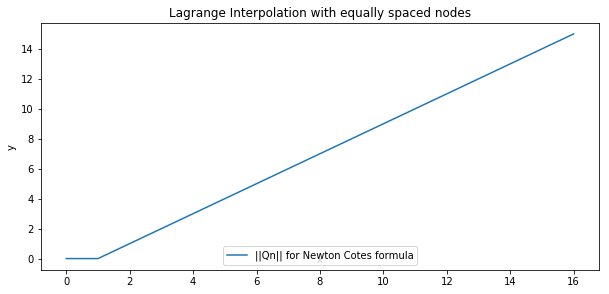

In [16]:
fig = plt.figure(figsize=(10,10)) #graph setup
ax1 = fig.add_subplot(211)

nn=17 # number of nodes
nlist = [x for x in range(nn)]
Qlist = [0 for x in range (nn)] #initializing

for i in range (nn):#computing f(x) for each x values
    Qlist[i]=summing(i)
ax1.plot(nlist,Qlist,label='||Qn|| for Newton Cotes formula')

plt.legend()                                                             #more graph setup - no math relevance
ax1.set_title(r'Lagrange Interpolation with equally spaced nodes')
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="lower center")
plt.show()

By looking at the values printed out we can guess that ||Qn||=n-1